# Titanic - Maskinlæring

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
titanic = pd.read_csv("titanic.csv")

In [83]:
# Skriv ut de fem første linjene
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [84]:
# Skriv hvor mange som overlevde
titanic["survived"].count()

891

In [85]:
# Slett kategorier som du mener er irrelevante for overlevelse
titanic.pop("alone")
titanic.pop("adult_male")
titanic.pop("parch")
titanic.pop("embarked")
titanic.pop("who")
titanic.pop("sibsp")
titanic.pop("deck")
titanic.pop("embark_town")
titanic.pop("fare")
titanic.pop("class")


0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: object

In [86]:
titanic

,survived,pclass,sex,age,alive
0,0,3,male,22.0,no
1,1,1,female,38.0,yes
2,1,3,female,26.0,yes
3,1,1,female,35.0,yes
4,0,3,male,35.0,no
...,...,...,...,...,...
886,0,2,male,27.0,no
887,1,1,female,19.0,yes
888,0,3,female,NaN,no
889,1,1,male,26.0,yes


In [75]:
# Print ut alle manglende verdier i en kolonne
print(titanic.isna().sum())

survived      0
pclass        0
sex           0
age         177
alive         0
dtype: int64


In [88]:
# Fyller inn manglende alder med gjennomsnittet
gjennomsnitt = titanic['age'].mean()
titanic['age'].fillna(gjennomsnitt, inplace = True)

# Dette kan være spesielt å gjøre i en slik situasjon. 
# Alder har ganske mye å si i min mening om man overlever eller ikke. Hvis man er eldgammel, 
# så har man jo mindre engergi osv osv. 


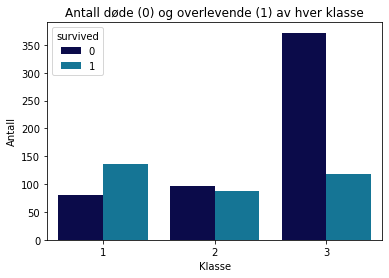

In [87]:
# Passasjerklasse
sns.countplot(x='pclass', hue='survived', data=titanic, palette='ocean')
plt.title("Antall døde (0) og overlevende (1) av hver klasse")
plt.xlabel("Klasse")
plt.ylabel("Antall")
plt.show()

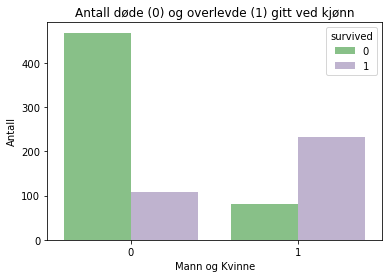

In [89]:
# Lag et tilsvarende plott som viser hvilken effekt kjønn hadde på overlevelsessjansene.
titanic["sex"] = titanic["sex"].map({"female":1,"male":0})
sns.countplot(x="sex", hue="survived", data=titanic, palette="Accent")
plt.title("Antall døde (0) og overlevde (1) gitt ved kjønn")
plt.xlabel("Mann og Kvinne")
plt.ylabel("Antall")
plt.show()

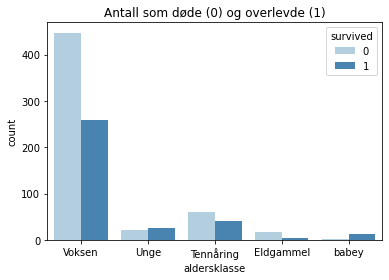

In [100]:
# Sortere etter alder
aldersklasse = []

for alder in titanic['age']:
    if alder < 2:
        aldersklasse.append("babey")
    elif alder >= 2 and alder < 10:
        aldersklasse.append("Unge")
    elif alder >= 10 and alder <= 19:
        aldersklasse.append("Tennåring")
    elif alder > 19 and alder <= 60:
        aldersklasse.append("Voksen")
    elif alder > 60:
        aldersklasse.append("Eldgammel")
   
    
titanic['aldersklasse'] = aldersklasse

# Plott effekten aldersklasse har på overlevelse
sns.countplot(x="aldersklasse", hue="survived", data=titanic, palette="Blues")
plt.title("Antall som døde (0) og overlevde (1)")


plt.show()


In [93]:
# Faktisk maskinlæring

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
kriterier = titanic[["sex", "pclass", "age"]]
kategorier = titanic["survived"]


In [103]:
testandel = 0.2 # Andel brukt til testing
ml_data = train_test_split(kriterier, kategorier, test_size=testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

In [104]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

In [105]:
modellkategorier_forutsett = modell.predict(testkriterier)
accuracy_score(testkategorier, modellkategorier_forutsett)

0.776536312849162

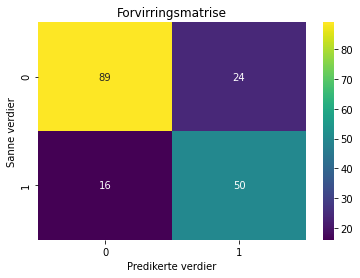

In [106]:
cm = confusion_matrix(modellkategorier_forutsett, testkategorier)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title("Forvirringsmatrise")
plt.xlabel("Predikerte verdier")
plt.ylabel("Sanne verdier")
plt.show()

In [ ]:
# Beregn andelen korrekt forventet død og korrekt forventet overlevelse.


